In [32]:
import pandas as pd
import numpy as np
import random
#from scipy.stats import norm
import math
%matplotlib inline

In [38]:
#return normal distribution for x
#def N(x, M, D):
#    return norm.cdf(x, M, D)

def N(x, M, D):
    return math.e ** ( - ((x - M) ** 2) / (2 * D)) / math.sqrt(2 * D * math.pi)

#return P(sex)
def P(alpha, pm, pf):
    return (alpha * pm) / (alpha * pm + (1 - alpha) * pf)

#return 1 and 2 median
def M(df):
	return df[df['Male'] == True].height.median(), df[df['Male'] == False].height.median()

#return alphas
def alphas(df):
	alpha_m = df[df['Male'] == True].shape[0] / float(selection_len)
	alpha_f = 1 - alpha_m
	return alpha_m, alpha_f

#return normal distribution for height columns (male and female median)
def p(df):
	df['pm'] = df.height.apply(lambda x: N(x, Mm, D))
	df['pf'] = df.height.apply(lambda x: N(x, Mf, D))
	return

#return sex for every object in column height (True if Male)
def Male(df):
	df['Male'] = df[['pm', 'pf']].apply(lambda x: P(alpha_m, x['pm'], x['pf']) >= random.random(), axis=1)

def alpha_search(df, alpha_m, alpha_f):
	p(df)
	Male(df)
	alpha_m, alpha_f = alphas(df)
	rMm, rMf = M(df)
	#print df.head(5)
	return alpha_m, alpha_f, rMm, rMf

def alpha_test(alpha_row):
	try:
		if len(alpha_row) < 10:
			return False
		eps_test = abs(np.mean(alpha_row[int(len(alpha_row)/2):]) - np.mean(alpha_row[:int(len(alpha_row)/2)]))
		print(str(eps_test) + ' -eps_test')
		print 'Mm:' + str(Mm) + ' Mf:' + str(Mf) + ' D:' + str(D) + ' alpha_m:' + str(alpha_m)# + ' alpha_f:' + str(alpha_f)
		print df.head()
		return eps_test <= eps
	except:
		return False

In [39]:
#read csv
df = pd.read_csv('dataset.csv', header=0, sep=' ')
del df['Unnamed: 1']

#get selection len
selection_len = len(df.values)

#get dispersion and eps
D = (4.785030177866893)**2 #df.height.std()**2
eps = 0.2

In [42]:
#get first step parameters
Mm = df.height.median()
Mf = df[(df['height'] > Mm) | (df['height'] < Mm)].height.median()
alpha_m = 0.39
alpha_f = 1 - alpha_m
alpha_row = np.array([alpha_m])

In [43]:
while not alpha_test(alpha_row):
	alpha_m, alpha_f, Mm, Mf = alpha_search(df, alpha_m, alpha_f)
	alpha_row = np.append(alpha_row, alpha_m)

#print('final_alpha: ' + str(alpha_m))

0.027 -eps_test
Mm:163.128663895 Mf:172.65000033 D:22.8965138031 alpha_m:0.435
       height        pm        pf   Male
0  157.711568  0.044336  0.000688   True
1  163.582843  0.082931  0.014498   True
2  170.156305  0.028014  0.073697  False
3  164.807430  0.078168  0.022645  False
4  163.045220  0.083369  0.011676   True


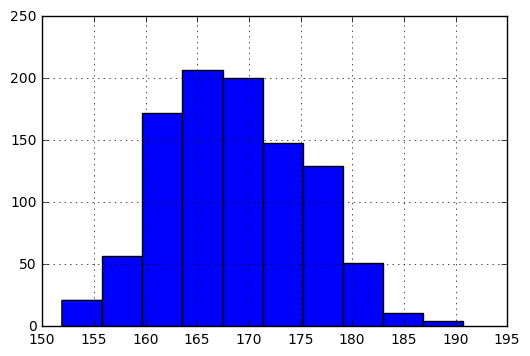

In [34]:
df.height.hist()